# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_classification
import seaborn as sns


**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [176]:
lin_diff_df = pd.read_csv('linearly_separable_data.csv', usecols=['x', 'y', 'class'])
lin_diff_df

,x,y,class
0,0.496714,-1.415371,0.0
1,-0.138264,-0.420645,0.0
2,0.647689,-0.342715,0.0
3,1.523030,-0.802277,0.0
4,-0.234153,-0.161286,0.0
...,...,...,...
195,2.307090,2.530824,1.0
196,3.899600,1.286865,1.0
197,3.307300,4.353872,1.0
198,3.812862,2.885460,1.0


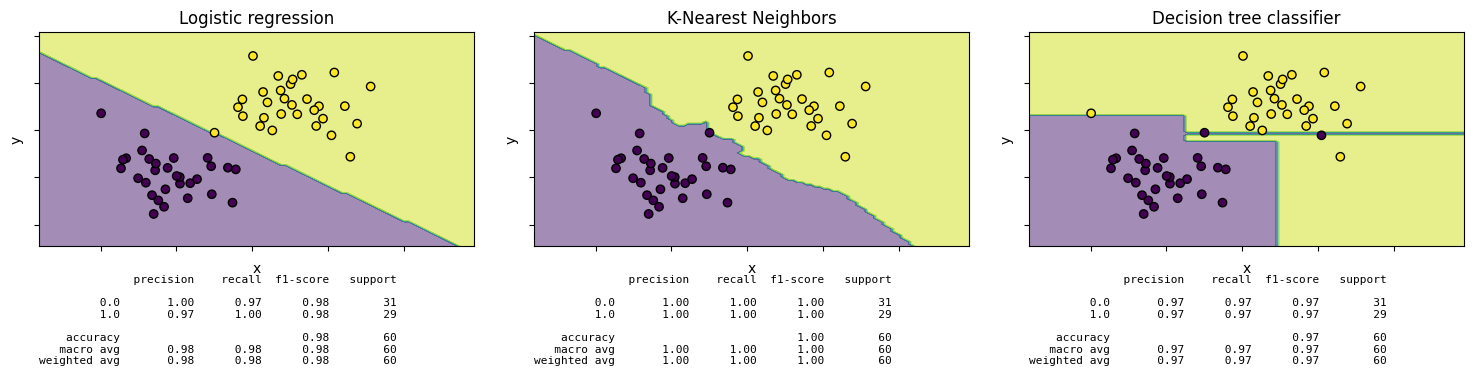

In [177]:
X = lin_diff_df[['x', 'y']].values
y = lin_diff_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig, (p1, p2, p3) = plt.subplots(1, 3, figsize=(15, 5))

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


display = DecisionBoundaryDisplay.from_estimator(
    log_reg, X, response_method="predict", ax=p1,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p1.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

p1.set_title('Logistic regression')

p1.set_yticklabels([])
p1.set_xticklabels([])

report_log_reg = classification_report(y_test, y_pred, output_dict=False)
p1.text(0, -0.6, report_log_reg, fontsize=8, transform=p1.transAxes, fontfamily="monospace")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    neigh, X, response_method="predict", ax=p2,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

p2.set_title('K-Nearest Neighbors')


p2.set_yticklabels([])
p2.set_xticklabels([])

report_neigh = classification_report(y_test, y_pred, output_dict=False)
p2.text(0, -0.6, report_neigh, fontsize=8, transform=p2.transAxes, fontfamily="monospace")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_m = tree.DecisionTreeClassifier()
tree_m.fit(X_train, y_train)

y_pred = tree_m.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    tree_m, X, response_method="predict", ax=p3,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p3.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

p3.set_title('Decision tree classifier')

p3.set_yticklabels([])
p3.set_xticklabels([])

report_tree = classification_report(y_test, y_pred, output_dict=False)
p3.text(0, -0.6, report_tree, fontsize=8, transform=p3.transAxes, fontfamily="monospace")


plt.tight_layout()
plt.show()



**Аналіз отриманих результатів**:

1. Точність логістичної регресії 0.98. Модель логістичної регресії найкраще підходить для розділення лінійнорозділюваних даних, які в нас і є. 
2. K-Nearest Neighbors також чудово працює і показує найвищий F-score але потенційно більш вразлива до перенавчання. 
3. Дерево рішень грубо розділило дані, показало такий самий результат в точності як і логістична регресія і так само більш схильне до перенавчання ніж логістична регресія.


**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


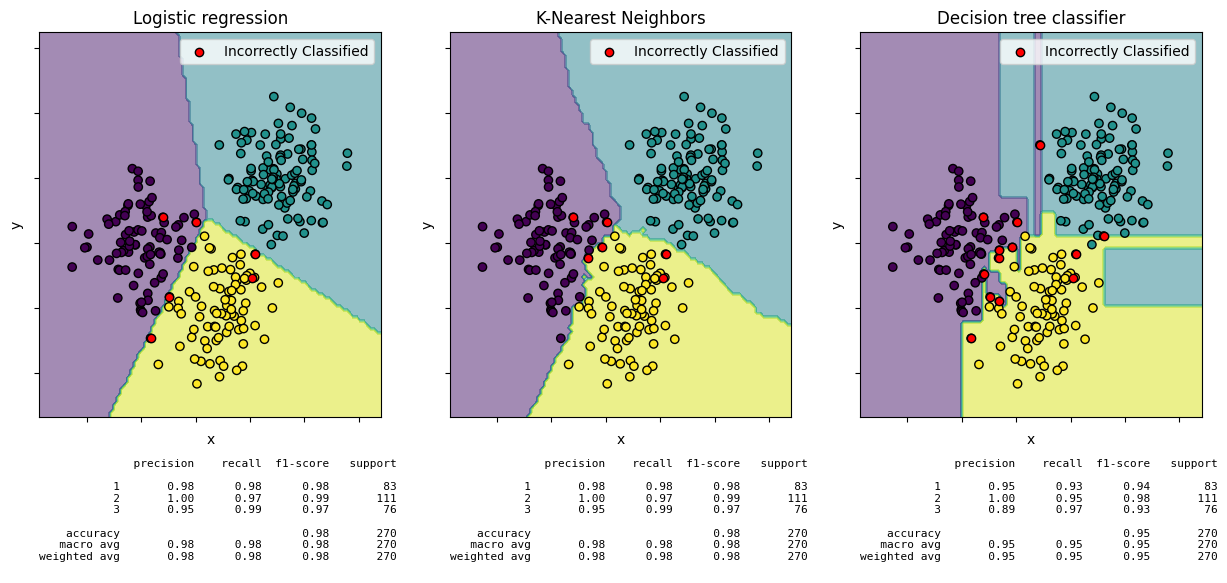

In [178]:
overlaping_df = pd.read_csv('overlaping.csv', usecols=['x', 'y', 'class'])

X = overlaping_df[['x', 'y']].values
y = overlaping_df['class'].values

fig, (p1, p2, p3) = plt.subplots(1, 3, figsize=(15, 5))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    log_reg, X, response_method="predict", ax=p1,
    xlabel='x', ylabel='y',
    alpha=0.5,
)
p1.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

incorrect_indices = []

for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        incorrect_indices.append(i)

p1.scatter(
    X_test[incorrect_indices, 0], 
    X_test[incorrect_indices, 1], 
    c='red', 
    edgecolor="k", 
    marker='o', 
    label='Incorrectly Classified'
)

p1.set_title('Logistic regression')

p1.set_yticklabels([])
p1.set_xticklabels([])

report_log_reg = classification_report(y_test, y_pred, output_dict=False)
p1.text(0, -0.4, report_log_reg, fontsize=8, transform=p1.transAxes, fontfamily="monospace")

p1.legend()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    neigh, X, response_method="predict", ax=p2,
    xlabel='x', ylabel='y',
    alpha=0.5,
)
p2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

incorrect_indices = []

for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        incorrect_indices.append(i)

p2.scatter(
    X_test[incorrect_indices, 0], 
    X_test[incorrect_indices, 1], 
    c='red', 
    edgecolor="k", 
    marker='o', 
    label='Incorrectly Classified'
)

p2.legend()

p2.set_title('K-Nearest Neighbors')


p2.set_yticklabels([])
p2.set_xticklabels([])

report_neigh = classification_report(y_test, y_pred, output_dict=False)
p2.text(0, -0.4, report_neigh, fontsize=8, transform=p2.transAxes, fontfamily="monospace")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_m = tree.DecisionTreeClassifier()
tree_m.fit(X_train, y_train)
y_pred = tree_m.predict(X_test)


disp = DecisionBoundaryDisplay.from_estimator(
    tree_m, X, response_method="predict", ax=p3,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p3.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

incorrect_indices = []

for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        incorrect_indices.append(i)

p3.scatter(
    X_test[incorrect_indices, 0], 
    X_test[incorrect_indices, 1], 
    c='red', 
    edgecolor="k", 
    marker='o', 
    label='Incorrectly Classified'
)

p3.legend()

p3.set_title('Decision tree classifier')

p3.set_yticklabels([])
p3.set_xticklabels([])

report_tree = classification_report(y_test, y_pred, output_dict=False)
p3.text(0, -0.4, report_tree, fontsize=8, transform=p3.transAxes, fontfamily="monospace")


plt.show()

**Аналіз отриманих результатів**:

1. Логістична регресія показує найкращий результат але через її лінійну межу вона не може нормально розрізняти класи що перетинаються.
2. KNN на цьому датасеті має такий самий як і логістична регресія результат але краще розрізняє складні межі нелінійно розділених класів.
3. Дерево рішень створило детальну і нерегулярну межу між класами. Показує найгірший результат і виглядає перенавченим.


**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

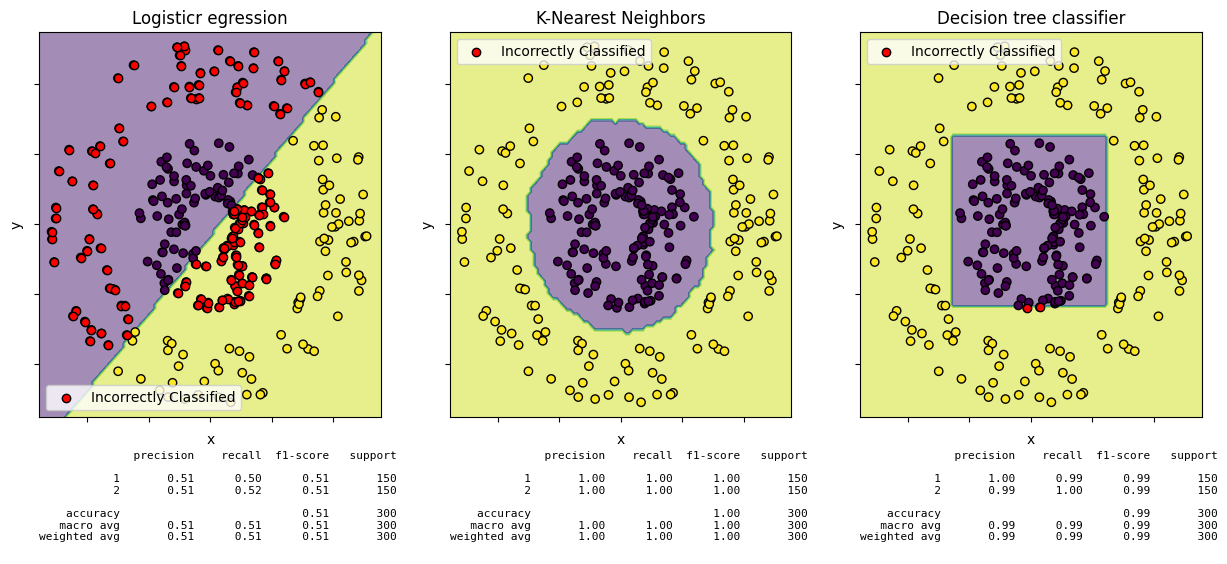

In [179]:
overlaping_df = pd.read_csv('thor_in_thor.csv', usecols=['x', 'y', 'class'])

fig, (p1, p2, p3) = plt.subplots(1, 3, figsize=(15, 5))

X = overlaping_df[['x', 'y']].values
y = overlaping_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    log_reg, X, response_method="predict", ax=p1,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p1.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

incorrect_indices = []

for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        incorrect_indices.append(i)

p1.scatter(
    X_test[incorrect_indices, 0], 
    X_test[incorrect_indices, 1], 
    c='red', 
    edgecolor="k", 
    marker='o', 
    label='Incorrectly Classified'
)

p1.set_title('Logisticr egression')

p1.set_yticklabels([])
p1.set_xticklabels([])

report_log_reg = classification_report(y_test, y_pred, output_dict=False)
p1.text(0, -0.35, report_log_reg, fontsize=8, transform=p1.transAxes, fontfamily="monospace")

p1.legend()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)


disp = DecisionBoundaryDisplay.from_estimator(
    neigh, X, response_method="predict", ax=p2,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

incorrect_indices = []

for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        incorrect_indices.append(i)

p2.scatter(
    X_test[incorrect_indices, 0], 
    X_test[incorrect_indices, 1], 
    c='red', 
    edgecolor="k", 
    marker='o', 
    label='Incorrectly Classified'
)

p2.set_title('K-Nearest Neighbors')

p2.set_yticklabels([])
p2.set_xticklabels([])

report_neigh = classification_report(y_test, y_pred, output_dict=False)
p2.text(0, -0.35, report_neigh, fontsize=8, transform=p2.transAxes, fontfamily="monospace")

p2.legend()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_m = tree.DecisionTreeClassifier()
tree_m.fit(X_train, y_train)
y_pred = tree_m.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    tree_m, X, response_method="predict", ax=p3,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p3.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

incorrect_indices = []

for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        incorrect_indices.append(i)

p3.scatter(
    X_test[incorrect_indices, 0], 
    X_test[incorrect_indices, 1], 
    c='red', 
    edgecolor="k", 
    marker='o', 
    label='Incorrectly Classified'
)

p3.legend()

p3.set_title('Decision tree classifier')

p3.set_yticklabels([])
p3.set_xticklabels([])

report_tree = classification_report(y_test, y_pred, output_dict=False)
p3.text(0, -0.35, report_tree, fontsize=8, transform=p3.transAxes, fontfamily="monospace")

plt.show()

**Аналіз отриманих результатів**:

1. Лінійна регресія очікувано абсолютно не підходить під цей датасет (оцінка f1 0.51 що дуже мало) бо вона розділяє дані лінійно. 
2. KNN сформував нелінійну межу і показав відмінний результат з ідеальними метриками точності та без жодної невірно класифікованої точки.
3. Дерево рішень сформувало нелінійні, вирівняні по осях межі. Метрики точності майже ідеальні але трохи гірші за KNN також через не плавні межі є деякі невірно класифіковані точки.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

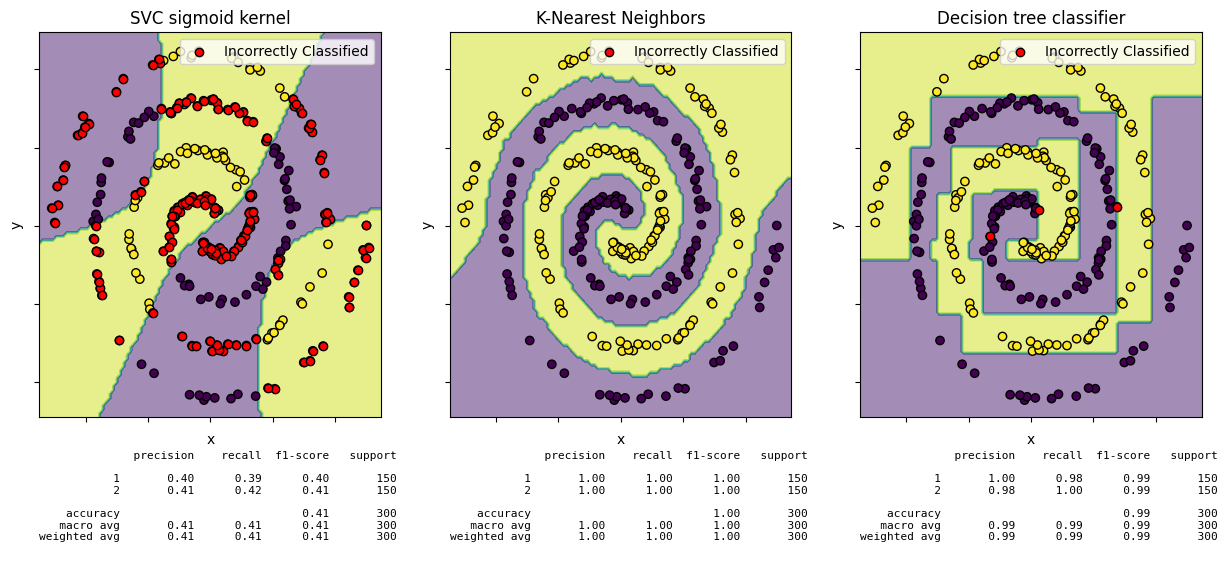

In [180]:
spiral_df = pd.read_csv('doble_spiral.csv', usecols=['x', 'y', 'class'])

fig, (p1, p2, p3) = plt.subplots(1, 3, figsize=(15, 5))

X = spiral_df[['x', 'y']].values
y = spiral_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    svc, X, response_method="predict", ax=p1,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p1.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

incorrect_indices = []

for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        incorrect_indices.append(i)

p1.scatter(
    X_test[incorrect_indices, 0], 
    X_test[incorrect_indices, 1], 
    c='red', 
    edgecolor="k", 
    marker='o', 
    label='Incorrectly Classified'
)

p1.set_title('SVC sigmoid kernel')

p1.set_yticklabels([])
p1.set_xticklabels([])

report_log_reg = classification_report(y_test, y_pred, output_dict=False)
p1.text(0, -0.35, report_log_reg, fontsize=8, transform=p1.transAxes, fontfamily="monospace")

p1.legend()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    neigh, X, response_method="predict", ax=p2,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

incorrect_indices = []

for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        incorrect_indices.append(i)

p2.scatter(
    X_test[incorrect_indices, 0], 
    X_test[incorrect_indices, 1], 
    c='red', 
    edgecolor="k", 
    marker='o', 
    label='Incorrectly Classified'
)

p2.set_title('K-Nearest Neighbors')

p2.set_yticklabels([])
p2.set_xticklabels([])

report_neigh = classification_report(y_test, y_pred, output_dict=False)
p2.text(0, -0.35, report_neigh, fontsize=8, transform=p2.transAxes, fontfamily="monospace")

p2.legend()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_m = tree.DecisionTreeClassifier()
tree_m.fit(X_train, y_train)
y_pred = tree_m.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    tree_m, X, response_method="predict", ax=p3,
    xlabel='x', ylabel='y',
    alpha=0.5,
)

p3.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor="k")

incorrect_indices = []

for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        incorrect_indices.append(i)

p3.scatter(
    X_test[incorrect_indices, 0], 
    X_test[incorrect_indices, 1], 
    c='red', 
    edgecolor="k", 
    marker='o', 
    label='Incorrectly Classified'
)

p3.legend()

p3.set_title('Decision tree classifier')

p3.set_yticklabels([])
p3.set_xticklabels([])

report_tree = classification_report(y_test, y_pred, output_dict=False)
p3.text(0, -0.35, report_tree, fontsize=8, transform=p3.transAxes, fontfamily="monospace")

plt.show()

**Аналіз отриманих результатів**:

1. Межі рішень SVM з сигмоїдним ядром намагається створити лінійні межі нелінійних класів через що є велика кількість неправильно класифікованих точок. Метрики підтверджують слабку продуктивність.
2. KNN знов ідеально класифікує дані. Метрики ідеальні, відсутні неправильно класифіковані точки.
3. Дерево рішень має також хороший результат але межі класів більш грубі і через це є невірно класифіковані точки.
4. Нелінійність сильно впливає на вибір моделі. Наприклад KNN і дерева рішень ефективно проводять класифікацію в таких типах даних. На відміну від логістичної регресії і SVC які краще класифікують лінійнороздільні класи.